In [696]:
"short preprocessing"

# !pip install mne
# !pip install pyxdf
# !pip install PyWavelets
# !pip install pandas 
!pip install pyprep
!pip install numpy==1.21.6

from tqdm import tqdm
import pyxdf
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from copy import deepcopy
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from mne.decoding import Scaler
import copy
import pathlib
from pathlib import Path
from typing import Dict, List, Optional, Union
from tqdm.auto import tqdm
# import plotly.graph_objects as go
# import plotly.subplots as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import argparse
from utils_clean import show_streams, find_stream, get_duration, get_time_series, set_channel_names, plot_channel_correlation,detect_bad_channels,plot_bads, ica_analysis,remove_breaks,build_class_epochs_mne,create_dataset,return_dataset,plot_topo,plot_eeg,plot_evoked,standartization

##ADDED:
import os
import mne
import numpy as np
import pickle
import pyprep
from pyprep.find_noisy_channels import NoisyChannels
from pyprep.prep_pipeline import PrepPipeline
import pandas as pd 
import argparse

import argparse


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5,

In [697]:
# session_name = "S01"
# base_path = "/Users/arnavkapur/Desktop/EEG_Speech"
# data_path = os.path.join(base_path, "DATA","RAW")

# xdf_file_path = os.path.join(data_path, f"{session_name}.xdf")
xdf_file_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\RAW\\S06.xdf"
# Load the .xdf file
data, header = pyxdf.load_xdf(xdf_file_path)
print(f"Successfully loaded data from {xdf_file_path}")

csv_file = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\S06.csv"
df = pd.read_csv(csv_file, header=None)

2024-11-25 00:34:48,017 - pyxdf.pyxdf - INFO - Importing XDF file C:\Users\msi\Desktop\Constanze\Docs\DATA\RAW\S06.xdf...
2024-11-25 00:34:51,199 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2024-11-25 00:34:51,274 - pyxdf.pyxdf - INFO -   performing jitter removal...


Successfully loaded data from C:\Users\msi\Desktop\Constanze\Docs\DATA\RAW\S06.xdf


In [698]:
print(np.__version__)

2.1.3


In [699]:
sample_rate = 500

show_streams(data)
eeg_stream = find_stream('eeg', data)
marker_stream = find_stream('marker', data)
df_marker = get_time_series(marker_stream)
sfreq = float(eeg_stream["info"]["nominal_srate"][0])

channels_info = eeg_stream['info']['desc'][0]['channels'][0]['channel']

# # Extract labels from each channel
ch_names = [channel['label'][0] for channel in channels_info]
ch_names = ['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2', 'ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']



"""Create MNE file raw containing the EEG Stream"""

eeg_data = eeg_stream["time_series"].T
eeg_data = eeg_data[:64]
print(eeg_data.shape)
sfreq = float(eeg_stream["info"]["nominal_srate"][0])

eeg_info = mne.create_info(64, sfreq, ["eeg"]*64)
raw = mne.io.RawArray(eeg_data, eeg_info)

# review information
ssp_projectors = raw.info["projs"]
raw.del_proj()
# Calculate the duration in seconds and convert to minutes
duration_minutes = (raw.n_times / raw.info['sfreq']) / 60

# Print the duration in minutes
print(f"Duration of the recording: {duration_minutes:.2f} minutes")
useless_channels = ['ECG', 'HEOR', 'HEOL', 'VEOU', 'VEOL']

#ADDED:
raw.resample(sample_rate)
raw.set_montage('standard_1020', on_missing='warn')   
set_channel_names(raw,ch_names)
raw.drop_channels(useless_channels)  
ch_names_new = ['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FT7', 'FT8', 'Cz', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'T7', 'T8', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'TP7', 'TP8', 'Pz', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POz', 'PO3', 'PO4', 'PO5', 'PO6', 'PO7', 'PO8', 'Oz', 'O1', 'O2']




Channel 0:
Effective Rate: 0
Start TimeStamp: 
Channel Name: ['LSLTrigger']
Channel Type: ['Markers']
Time Series Shape: (856, 1)
--------------------
Channel 1:
Effective Rate: 0
Start TimeStamp: 
Channel Name: ['79522685']
Channel Type: ['Markers']
Time Series Length: 0
--------------------
Channel 2:
Effective Rate: 100.00000005739982
Start TimeStamp: 
Channel Name: ['E7240457_MEMsAll']
Channel Type: ['MEMsAll']
Time Series Shape: (230007, 9)
--------------------
Channel 3:
Effective Rate: 1000.0000001467248
Start TimeStamp: 
Channel Name: ['E7240457_EEG']
Channel Type: ['EEG']
Time Series Shape: (2300070, 64)
--------------------
(64, 2300070)
Creating RawArray with float64 data, n_channels=64, n_times=2300070
    Range : 0 ... 2300069 =      0.000 ...  2300.069 secs
Ready.
Duration of the recording: 38.33 minutes
New channel names: ['Fpz', 'Fp1', 'Fp2', 'AF3', 'AF4', 'AF7', 'AF8', 'Fz', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FCz', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6'

C:\Users\msi\AppData\Local\Temp\ipykernel_15288\2869410118.py:39: RuntimeWarning: DigMontage is only a subset of info. There are 64 channel positions not present in the DigMontage. The channels missing from the montage are:

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage('standard_1020', on_missing='warn')


In [700]:
from pyprep.prep_pipeline import PrepPipeline

# # Define preprocessing parameters
# prep_params = {
#     "ref_chs": "eeg",
#     "reref_chs": "eeg",
#     "line_freqs": np.arange(60, sample_rate / 2, 60),
# }

# # Assign a valid montage (standard 10-20 system)
# montage = 'standard_1020'  # Use the name of the standard montage

# RANSAC = False
# print("Running pyprep")

# prep = PrepPipeline(
#     raw,
#     prep_params,
#     montage=montage,  # Pass the montage name
#     ransac=RANSAC
# )
# prep.fit()
# raw_new = prep.raw
# print("Preprocessing completed.")
# print("Still bad channels: ", raw_new.info['bads'])

# High-pass filter
raw.filter(l_freq=1, h_freq=None)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


<RawArray | 59 x 1150035 (2300.1 s), ~517.7 MB, data loaded>

In [702]:
eeg_start = eeg_stream['time_stamps'][0]  # EEG start time

print("EEG START", eeg_start)
# marker_start = data[1]['time_stamps'][0]  # Marker start time
marker_start = marker_stream['time_stamps'][0]  # Marker start time

time_offset = eeg_stream['clock_times'][0] - marker_stream['clock_times'][0]
print("TIME OFFSET", time_offset)

# Use NumPy arrays for efficiency, avoid copying unnecessarily
marker_times = np.asarray(marker_stream['time_stamps'])  # Convert to NumPy array directly
eeg_time = np.asarray(eeg_stream['time_stamps'])      # Convert to NumPy array directly

# Precompute aligned marker times
aligned_marker_relative = marker_times + time_offset - marker_start + eeg_start


EEG START 407.5513898377224
TIME OFFSET -0.0009976495057344437


In [701]:

# eeg_start = eeg_stream['time_stamps'][0]  # EEG start time, 679.891
# marker_start = marker_stream['time_stamps'][0]  # Marker start time, 2311465.920826529

# time_offset = eeg_stream['clock_times'][0] - eeg_stream['clock_times'][0]
# aligned_marker_relative = [(ts + time_offset - marker_start + eeg_start) for ts in eeg_stream['time_stamps']]

# aligned_pairs = []
# for marker_time in aligned_marker_relative:
#     closest_idx = np.argmin(np.abs(np.array(eeg_stream['time_stamps']) - marker_time))
#     aligned_pairs.append((marker_time, eeg_stream['time_stamps'][closest_idx]))
# df_marker = pd.DataFrame(marker_stream['time_series'], aligned_marker_relative,columns=['marker'])


KeyboardInterrupt: 

In [ ]:



# eeg_start = eeg_stream['time_stamps'][0]  # EEG start time, 679.891
# marker_start = marker_stream['time_stamps'][0]  # Marker start time, 2311465.920826529

# time_offset = eeg_stream['clock_times'][0] - eeg_stream['clock_times'][0]
# aligned_marker_relative = [(ts + time_offset - marker_start + eeg_start) for ts in eeg_stream['time_stamps']]

# aligned_pairs = []
# for marker_time in aligned_marker_relative:
#     closest_idx = np.argmin(np.abs(np.array(eeg_stream['time_stamps']) - marker_time))
#     aligned_pairs.append((marker_time, eeg_stream['time_stamps'][closest_idx]))
# df_marker = pd.DataFrame(marker_stream['time_series'], aligned_marker_relative,columns=['marker'])


KeyboardInterrupt: 

In [703]:
# Extract the sentences column
sentences = df.iloc[2:, 0].values  # Ensure this is a numpy array or list for proper assignment
labels = df.iloc[2:, 1].values  # Ensure this is a numpy array or list for proper assignment

# Filter rows with marker == 1 and create a new column in df_marker
df_marker.loc[df_marker['marker'] == 1, 'sentences'] = sentences
df_marker.loc[df_marker['marker'] == 1, 'labels'] = labels
metadata = df_marker.loc[df_marker['marker'] == 1]
metadata = metadata.iloc[:-1]
metadata

,marker,sentences,labels
2.664008e+06,1,I need to go to the store to pick up some groc...,1
2.664014e+06,1,"Can you help me with this project, or maybe sh...",0
2.664020e+06,1,"Do you want a cup of coffee, or would you pref...",4
2.664026e+06,1,"Where did you put my keys, or did you see them...",2
2.664032e+06,1,"I will be back in five minutes, so just wait h...",3
...,...,...,...
2.667109e+06,1,"Do you want a cup of coffee, or would you pref...",4
2.667113e+06,1,"Can you help me with this project, or maybe sh...",0
2.667118e+06,1,I need to go to the store to pick up some groc...,1
2.667123e+06,1,"Can you help me with this project, or maybe sh...",0


In [ ]:
labels = df.iloc[2:-1, 1]
labels 

2      1
3      4
4      0
5      2
6      3
      ..
779    4
780    1
781    2
782    4
783    3
Name: 1, Length: 782, dtype: object

In [ ]:
split_datasets[0]['label']

0       1
1       1
2       1
3       1
4       1
       ..
2454    1
2455    1
2456    1
2457    1
2458    1
Name: label, Length: 2459, dtype: int64

In [ ]:

dataset = []
df = pd.concat([pd.DataFrame({'time': eeg_timestamps, 'label': labels}), out], axis=1)
dataset.append(df)
dataset['label']


TypeError: list indices must be integers or slices, not str

In [704]:

sf = 500
eeg_time_series = raw.get_data()
eeg_time_series = eeg_time_series.T
eeg_timestamps = eeg_stream["time_stamps"]
event_time_series= marker_stream['time_series']
event_time_stamps= aligned_marker_relative

event_time_series_onset = df_marker[df_marker['marker'] == 1].reset_index()
event_time_series_offset = df_marker[df_marker['marker'] == 0].reset_index()
event_time_series_onset['numb'] = range(len(event_time_series_onset))
event_time_series_offset['numb'] = range(len(event_time_series_offset))
print("EVNETTIMESERIES", event_time_series_onset.shape)
print("EVENTTIMESERIESOFFSET", event_time_series_offset.shape)

eeg_closest_timestamps = []  

for event_time in event_time_stamps:
    closest_index = np.argmin(np.abs(eeg_timestamps - event_time))
    closest_timestamp = eeg_timestamps[closest_index]  
    eeg_closest_timestamps.append(closest_timestamp)


eeg_indeces = np.array(eeg_closest_timestamps)

labels = np.empty(eeg_timestamps.shape, dtype=int)
labels.fill(900) #Fill with 900 (break)
group_labels = np.copy(labels)
trials = np.copy(labels)

start = eeg_indeces[0]

eeg_data = eeg_time_series[:, :59]
out = pd.DataFrame(eeg_data, columns=ch_names_new)
print("OUT",out.shape)    


"Define the labels for the 5 sentences"

trial_label = df.iloc[2:-1, 1]
nan_count = trial_label.isna().sum()
trial_label = trial_label.dropna().astype(int)
print("Trial label shape", trial_label.shape)
print("Trial Labels:",trial_label)  

trial_label.index = range(len(trial_label))
event_time_series_offset['label'] = trial_label.astype(int)
event_time_series_offset = event_time_series_offset[:-1]
event_time_series_onset['label'] = trial_label.astype(int)  
event_time_series_onset = event_time_series_onset[:-1]


# Build the dataset
start_index = eeg_indeces[::2]
end_index = eeg_indeces[1::2]
start_index = start_index[:-1]
end_index = end_index[:-1]
print("START AND END", start_index.shape, end_index.shape, event_time_series_onset['label'].shape) #(461,) (461,) (461,)



durations = end_index - start_index
labels = np.full(len(eeg_timestamps), 900)

sf = sample_rate
for i in range(len(start_index)):
    start_idx = np.where(eeg_timestamps == start_index[i])[0]
    if len(start_idx) == 0:
        print(f"Start index {start_index[i]} not found in eeg_timestamps.")
        continue
    start_idx = start_idx[0]
        
    num_timestamps = int(durations[i] * sf)
    end_idx = min(start_idx + num_timestamps, len(eeg_timestamps))
    labels[start_idx:end_idx] = event_time_series_onset['label'][i]


# df = pd.DataFrame({'time': eeg_timestamps, 'label': labels})


dataset = []
df = pd.concat([pd.DataFrame({'time': eeg_timestamps, 'label': labels}), out], axis=1)
dataset.append(df)



def print_sample_distribution(labels):
    label_count = pd.Series(labels).value_counts().sort_index()

    print("Time sample distribution among different trials:")
    for label, count in label_count.items():
        print(f"Label {label}: {count} time samples")
        


label_count = df['label'].value_counts()
dataset[0]['label'].value_counts()

"Delete the breaks from the dataset"
#  using .query() to maintain the order of the columns removing th
dataset[0] = dataset[0].query("label != 900").reset_index(drop=True)

# using this to remove breaks without maining   the order of the columns
# dataset[0] = dataset[0].loc[dataset[0]['label'] != 900].reset_index(drop=True)
# dataset[0]['label'].value_counts()

# Split the dataset based on the durations into trials
split_datasets = []
start_idx = 0
d =dataset[0]    

for duration in durations:
    end_idx = start_idx + int(duration * sf)
    split_df = d.iloc[start_idx:end_idx].copy()
    split_datasets.append(split_df)
    start_idx = end_idx

# Padding data to max timestamp
max_duration = 0
longest_array = None

for dataset in split_datasets:
    duration = d['time'].iloc[-1] - d['time'].iloc[0]
    if duration > max_duration:
        max_duration = duration
        longest_array = dataset

print("MAX Duration", max_duration)

max_length = max([dataset.shape[0] for dataset in split_datasets])


EVNETTIMESERIES (428, 5)
EVENTTIMESERIESOFFSET (428, 5)
OUT (1150035, 59)
Trial label shape (427,)
Trial Labels: 2      1
3      0
4      4
5      2
6      3
      ..
424    4
425    0
426    1
427    0
428    3
Name: 1, Length: 427, dtype: int64
START AND END (427,) (427,) (427,)
MAX Duration 2299.136999662659


In [705]:
for i, dataset in enumerate(split_datasets):
    first_label = int(split_datasets[0]['label'].iloc[0])    
    print(first_label)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [706]:


padded_dataset = []

for dataset in split_datasets:
    num_samples_to_pad = max_length - dataset.shape[0]
    
    if num_samples_to_pad > 0:
        print("TES",dataset['label'])
        label = int(split_datasets[0]['label'].iloc[0])  # Retrieve the first row's label
        padding_df = pd.DataFrame(0, index=range(num_samples_to_pad), columns=dataset.columns)
        padding_df['label'] = label
        
        padded_dataset.append(pd.concat([dataset, padding_df], ignore_index=True))
    else:
        padded_dataset.append(dataset)

dataset_lengths = [dataset.shape[0] for dataset in padded_dataset]
print(f"Lengths after padding: {set(dataset_lengths)}")  
# for dataset in padded_dataset:
#     print(dataset['label'].value_counts())

dataset_lengths = [dataset.shape[0] for dataset in padded_dataset]

min_length = min(dataset_lengths)
max_length = max(dataset_lengths)

print(f"Minimum length: {min_length}")
print(f"Maximum length: {max_length}")

TES 0       1
1       1
2       1
3       1
4       1
       ..
2214    1
2215    1
2216    1
2217    1
2218    1
Name: label, Length: 2219, dtype: int64
TES 2219    0
2220    0
2221    0
2222    0
2223    0
       ..
4400    0
4401    0
4402    0
4403    0
4404    0
Name: label, Length: 2186, dtype: int64
TES 4405    4
4406    4
4407    4
4408    4
4409    4
       ..
7005    4
7006    4
7007    4
7008    4
7009    4
Name: label, Length: 2605, dtype: int64
TES 7010    2
7011    2
7012    2
7013    2
7014    2
       ..
9743    2
9744    2
9745    2
9746    2
9747    2
Name: label, Length: 2738, dtype: int64
TES 9748     3
9749     3
9750     3
9751     3
9752     3
        ..
12315    3
12316    3
12317    3
12318    3
12319    3
Name: label, Length: 2572, dtype: int64
TES 12320    0
12321    0
12322    0
12323    0
12324    0
        ..
14770    0
14771    0
14772    0
14773    0
14774    0
Name: label, Length: 2455, dtype: int64
TES 14775    2
14776    2
14777    2
14778    2
14779 

In [ ]:
event_time_series_onset

,index,marker,sentences,labels,numb,label
0,679.891112,1,"Do you want a cup of coffee, or would you pref...",4,0,4.0
1,689.691640,1,"Where did you put my keys, or did you see them...",2,1,2.0
2,696.343233,1,I need to go to the store to pick up some groc...,1,2,1.0
3,701.874266,1,"Can you help me with this project, or maybe sh...",0,3,0.0
4,708.573934,1,"I will be back in five minutes, so just wait h...",3,4,3.0
...,...,...,...,...,...,...
456,3893.043037,1,"Do you want a cup of coffee, or would you pref...",4,456,4.0
457,3898.277044,1,I need to go to the store to pick up some groc...,1,457,1.0
458,3936.526081,1,"I will be back in five minutes, so just wait h...",3,458,3.0
459,3964.427916,1,"Where did you put my keys, or did you see them...",2,459,2.0


In [ ]:
import numpy as np

# Assuming 'event_time_series_onset' contains 'index' for sample indices and 'label' for event labels
# Extract the first column as floatsastype(int)
first_column = np.round(event_time_series_onset['index'].values).astype(int)
second_column = np.zeros(len(first_column), dtype=int)
third_column = event_time_series_onset['labels'].values.astype(int)

events = np.column_stack((first_column, second_column, third_column))

print("Formatted Events Array with Mixed Types:")
print(events)


Formatted Events Array with Mixed Types:
[[2560723       0       4]
 [2560730       0       1]
 [2560735       0       0]
 ...
 [2564744       0       0]
 [2564749       0       4]
 [2564754       0       3]]


In [ ]:
data = [df.iloc[:, -59:] for df in padded_dataset]
labels =  [df.iloc[:,1] for df in padded_dataset]
print(data)

[               Fpz           Fp1           Fp2           AF3           AF4  \
0     1.021405e-11  2.611245e-13 -1.713651e-11  8.281376e-12 -4.407141e-12   
1     3.556514e+00  7.359480e-01  3.119963e+00 -1.804504e+00  3.394752e+00   
2     3.480293e+00 -1.077880e+00  3.138516e+00 -8.406027e-01  4.274563e+00   
3     3.093663e+00 -9.392206e+00  3.225913e+00  1.224876e+00  5.646875e+00   
4     1.069129e+00 -3.802194e+00  3.003552e-01  3.466602e-01  1.865314e+00   
...            ...           ...           ...           ...           ...   
3593  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3594  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3595  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3596  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3597  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

               AF7           AF8            Fz            F1  

In [ ]:
import numpy as np

# Each DataFrame has shape (n_times, n_channels)
# Transpose each DataFrame and convert to NumPy
eeg_data_concat = np.concatenate([df.T for df in data], axis=1)  # Transpose and concatenate

# Verify the concatenated data shape
print(f"Shape of concatenated data for RawArray: {eeg_data_concat.shape}")  # (n_channels, n_times)

# eeg_data_list = [df.to_numpy().T for df in data]

# eeg_data = np.stack(eeg_data_list, axis=0)

# print(f"Shape of MNE-compatible data: {eeg_data.shape}")  # (n_epochs, n_channels, n_times)
info = mne.create_info(ch_names=ch_names_new, sfreq=500, ch_types="eeg")
# Create the RawArray
dataeeg = mne.io.RawArray(eeg_data_concat, info)

# Verify the created Raw object
tmax = max_duration/sample_rate +0.1



epochs = mne.Epochs( 
    raw=dataeeg, 
    events=events,
    tmin=0, 
    tmax= tmax, 
    baseline = None,
    metadata= metadata)

# Verify
print(epochs)


Shape of concatenated data for RawArray: (59, 1658678)
Creating RawArray with float64 data, n_channels=59, n_times=1658678
    Range : 0 ... 1658677 =      0.000 ...  3317.354 secs
Ready.
Adding metadata with 3 columns
461 matching events found
No baseline correction applied
0 projection items activated
<Epochs | 461 events (good & bad), 0 – 6.686 s (baseline off), ~48 kB, data not loaded, with metadata,
 '0': 92
 '1': 92
 '2': 93
 '3': 92
 '4': 92>


In [ ]:
d = dataeeg.get_data()
print(d.shape)  # Shape: (n_channels, n_samples)
d

(59, 1658678)


array([[ 1.02140518e-11,  3.55651438e+00,  3.48029291e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.61124455e-13,  7.35947968e-01, -1.07787983e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.71365144e-11,  3.11996341e+00,  3.13851578e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.48894263e-13,  2.98861686e-01,  1.68904673e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.66338121e-13,  2.94760059e+00,  7.50732914e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.55306878e-11, -9.20464890e-01,  3.26014454e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

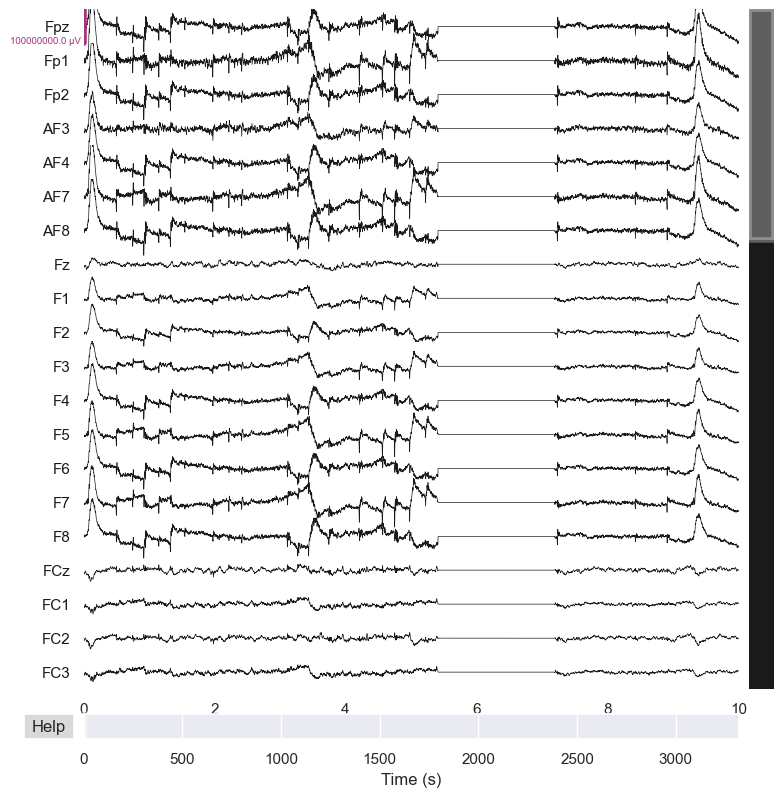

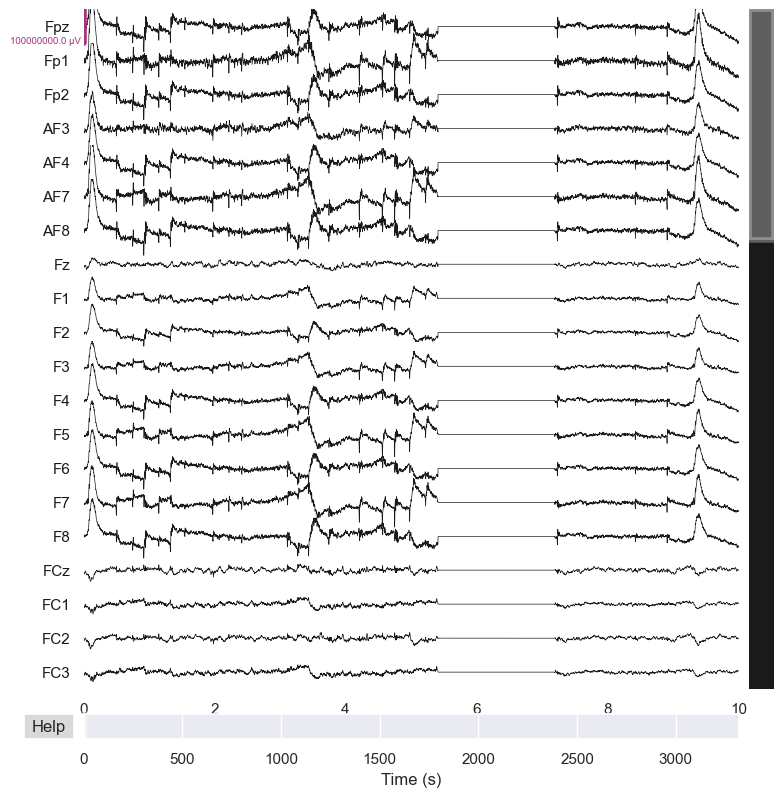

In [ ]:
dataeeg.plot(scalings = 50)

Using data from preloaded Raw for 20 events and 3344 original time points ...


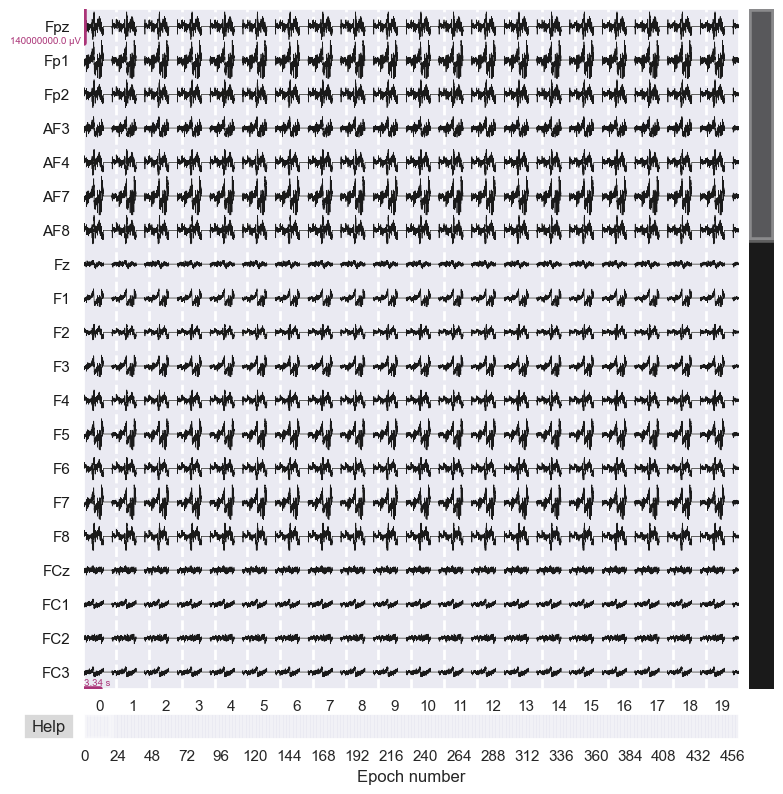

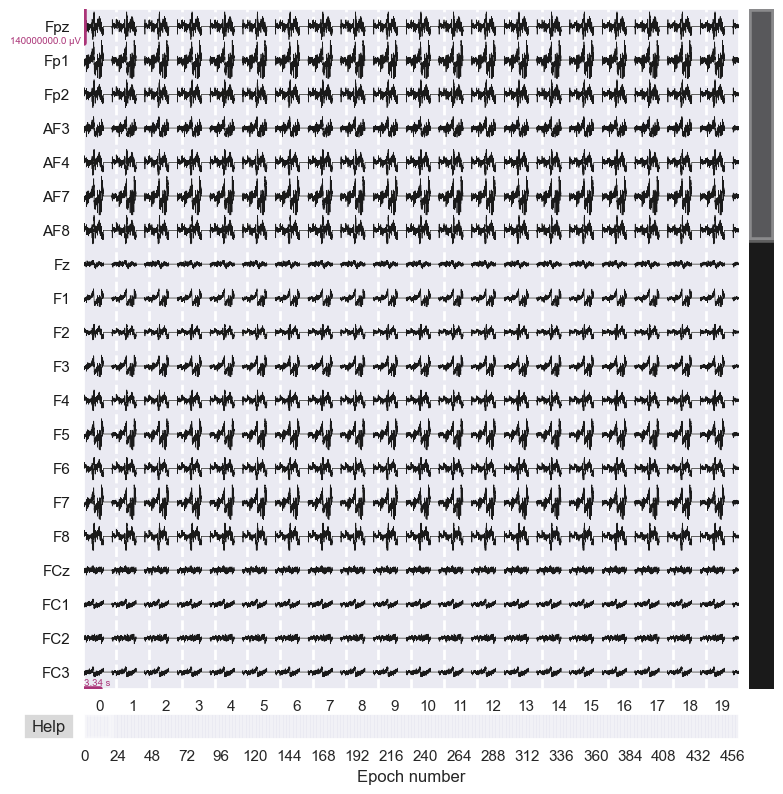

In [ ]:
epochs.plot( scalings = 70)

In [ ]:
# !pip install autoreject
# from autoreject import AutoReject
# ar = AutoReject()
# epochs_clean_r, reject_log_r = ar.fit_transform(epochs, return_log=True)
# # epochs_clean_i, reject_log_i = ar.fit_transform(epochs_i, return_log=True)
# # else:
# #     print("Not running autoreject")
# #     epochs_clean_r = epochs
# #     epochs_clean_i = epochs

In [ ]:
# !pip install mne_icalabel
# from mne_icalabel import label_components
# epochs_clean_r = epochs

# ica_r = mne.preprocessing.ICA(n_components=30, random_state=97, max_iter="auto",method='infomax', fit_params=dict(extended=True)) # 使用extended-infomax算法
# ica_r.fit(epochs_clean_r)
# ic_labels_r = label_components(epochs_clean_r, ica_r, method="iclabel")
# labels_r = ic_labels_r["labels"]
# exclude_idx_r = [
#     idx for idx, label in enumerate(labels_r) if label not in ["brain", "other"]
# ]
# print(f"Reading Epochs Excluding these ICA components: {exclude_idx_r}")
# epochs_clean_r_reconstructed = epochs_clean_r.copy()
# ica_r.apply(epochs_clean_r_reconstructed, exclude=exclude_idx_r)

# # ica_i = mne.preprocessing.ICA(n_components=30, random_state=97, max_iter="auto",method='infomax', fit_params=dict(extended=True))
# # ica_i.fit(epochs_clean_i)
# # ic_labels_i = label_components(epochs_clean_i, ica_i, method="iclabel")
# # labels_i = ic_labels_i["labels"]
# # exclude_idx_i = [
# #     idx for idx, label in enumerate(labels_i) if label not in ["brain", "other"]
# # # ]
# # # print(f"Imagine Epochs Excluding these ICA components: {exclude_idx_i}")
# # epochs_clean_i_reconstructed = epochs_clean_i.copy()
# # ica_i.apply(epochs_clean_i_reconstructed, exclude=exclude_idx_i)


In [ ]:
epochs

<Epochs | 461 events (good & bad), 0 – 6.686 s (baseline off), ~48 kB, data not loaded, with metadata,
 '0': 92
 '1': 92
 '2': 93
 '3': 92
 '4': 92>

In [ ]:
import os
import pickle

# file_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\data.pkl"
data_to_save = []
for epoch_idx in range(len(epochs)):
    # Extract sentence (or None if metadata is unavailable)
    sentence = (
        epochs.metadata.iloc[epoch_idx]['sentences'] 
        if epochs.metadata is not None else None
    )
    data = epochs[epoch_idx].get_data(copy=False)
    print(f"Epoch {epoch_idx} data shape: {data.shape}")
    data_to_save.append({"text": sentence, "input_features": data})

# with open(file_path, 'wb') as file:
#     pickle.dump(data_to_save, file)

# print(f"Data successfully saved to {file_path}")


Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 0 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 1 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 2 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 3 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 4 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 5 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 6 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 7 data shape: (1, 59, 3344)
Using data from preloaded Raw for 1 events and 3344 original time points ...
Epoch 8 data shape: (1, 59, 3344)
U

In [ ]:
# import pickle
# # import torch
# import numpy 

# def load_preprocessed_data(file_path: str):
#     """
#     Loads preprocessed data from the given pickle file.
#     Adjusts shapes and data types as needed for downstream processing.
#     """
#     if not os.path.exists(file_path):
#         raise FileNotFoundError(f"File not found at {file_path}")
    
#     # Load the preprocessed data
#     with open(file_path, "rb") as file:
#         data = pickle.load(file)
#         print( len(data))



#     dsplit = {"input_features": [], "labels": []}
#     for idx, trial in enumerate(data):
#         # Extract `text` and `input_features`
#         text = trial["text"]
#         # input_features = trial["input_features"]
#         input_features = trial['input_features'][0, :59, :]*1000000
#         mean = numpy.absolute(numpy.mean(input_features, axis=1))
#         stds = numpy.std(input_features, axis=1)
#         # Ensure `input_features` is a numpy array and has the correct shape
#         if not isinstance(input_features, np.ndarray):
#             input_features = np.array(input_features)

#         # Check the expected shape of input_features (adjust based on your saving format)
#         # Your shape: (1, 59, 501) -> Remove the first dimension
#         assert input_features.shape[0] == 1, f"Unexpected shape: {input_features.shape}"
#         input_features = input_features[0]

#         # Convert to float32 for compatibility
#         input_features = np.float32(input_features)
#         # input_features = torch.tensor(input_features)

#         # Add to the dataset
#         dsplit["input_features"].append(input_features)
#         dsplit["labels"].append(text)

#     print(f"Loaded {len(dsplit['input_features'])} trials from {file_path}")
#     return dsplit

# def get_dataset_from_path(file_path: str):
#     """
#     Wrapper for loading dataset.
#     """
#     return load_preprocessed_data(file_path)

# # Example Usage
# file_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\data.pkl"
# dataset = get_dataset_from_path(file_path)

# # Check dataset structure
# print(f"Number of trials: {len(dataset['input_features'])}")
# print(f"Shape of first trial: {dataset['input_features'][0].shape}")
# print(f"First label: {dataset['labels'][0]}")


## READ in pickle to check

In [ ]:
np.save('C:\\Users\\msi\\Desktop\Constanze\Docs\DATA\PREPROCESSED\S01\data.npy')

In [ ]:
import os
import json
import numpy as np

def calculate_max_length(base_path, session_range, skip_session="S02"):
    """
    Reads all session files, calculates the maximum data length, and returns the overall maximum length.
    
    Args:
        base_path (str): The base directory where session files are stored.
        session_range (range): Range of session numbers (e.g., range(1, 7) for S01 to S06).
        skip_session (str): The session name to skip (e.g., "S02").
        
    Returns:
        int: The maximum length across all sessions.
    """
    max_lengths = []  # List to store the max length of each session

    for session_num in session_range:
        session_name = f"S{session_num:02d}"
        if session_name == skip_session:
            print(f"Skipping session: {session_name}")
            continue

        # Path to the JSON file for the current session
        json_path = os.path.join(base_path, f"{session_name}.json")

        if not os.path.exists(json_path):
            print(f"Session file not found: {json_path}")
            continue

        # Load session data
        try:
            with open(json_path, "r") as file:
                session_data = json.load(file)
                print(f"Loaded session: {session_name}, Number of entries: {len(session_data)}")

                # Calculate lengths (assume session_data is a dict of lists or arrays)
                session_lengths = [len(entry) for entry in session_data.values()]
                max_lengths.append(max(session_lengths))
        except Exception as e:
            print(f"Error loading session {session_name}: {e}")
            continue

    # Determine the overall maximum length
    overall_max_length = max(max_lengths) if max_lengths else 0
    return overall_max_length


# Define base path and session range
base_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\textmaps"
session_range = range(1, 7)  # Sessions S01 to S06

# Calculate the max length
overall_max_length = calculate_max_length(base_path, session_range)

print(f"Overall maximum length across all sessions: {overall_max_length}")


In [763]:
# import torch
# Load the preprocessed data
import numpy

session = "S04"
# paths = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\sub-01_task-imagine_run-011_eeg.pkl"
# paths = f"C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH\\{session}\\data.pkl"
paths = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PROCESSED\\PREP_CH_5SEC\\S01\\data.pkl"

def get_imagine(sub: str):
    with open(paths, "rb") as file:
            data = pickle.load(file)
            print( len(data))
    
    # data = data.astype('float64')
    pickles = data
    
    
    for idx, trial in enumerate(pickles):
        assert isinstance(trial['input_features'], numpy.ndarray)
        # assert trial['input_features'].dtype == numpy.float64
        # assert trial['input_features'].shape == (1, 59, 3344)
        input_features = trial['input_features'][0, :59, :]#*1000000
        mean = np.absolute(np.mean(input_features, axis=1))
        stds = np.std(input_features, axis=1)
        # assert isinstance(input_features, numpy.ndarray)
        # assert input_features.dtype == numpy.float64
        # assert input_features.shape == (59, 3344)
        # assert (mean > 0).all() and (mean < 10000).all()
        # assert (stds > 0).all() and (stds < 10000).all()
    return pickles

    # for idx, trial in enumerate(pickles):
    #     assert isinstance(trial['input_features'], numpy.ndarray)
    #     assert trial['input_features'].dtype == numpy.float64
    #     assert trial['input_features'].shape == (1, 125, 1651)
    #     input_features = trial['input_features'][0, :122, :]*1000000
    #     mean = numpy.absolute(numpy.mean(input_features, axis=1))
    #     stds = numpy.std(input_features, axis=1)
    #     assert isinstance(input_features, numpy.ndarray)
    #     assert input_features.dtype == numpy.float64
    #     assert input_features.shape == (122, 1651)
    #     assert (mean > 0).all() and (mean < 10000).all()
    #     assert (stds > 0).all() and (stds < 10000).all()
    # return pickles

def get_dataset(sub: str):
    dsplit = {"input_features": [], "labels": []}
    # for epoch in range(1, 46): ## CHECK WHY 46
    pickles = get_imagine(sub)  ## CHANGE: Added the call to `get_imagine` to fetch data for each epoch.
    for trial in pickles:
        input_features = trial['input_features'][0, :59, :]#*1000000
        input_ids = trial['text'].strip()
        input_features = np.float32(input_features)
        # input_features = torch.tensor(input_features)
        dsplit["input_features"].append(input_features)
        dsplit["labels"].append(input_ids)
    return dsplit


subject = "sub-01"
data = get_dataset(subject)
inputs = data["input_features"]
labels = data["labels"]
data

461


{'input_features': [array([[  7.246406 ,   5.921437 ,   3.2886684, ..., -17.305    ,
          -16.211208 , -14.610127 ],
         [  9.00815  ,   6.855697 ,   3.725619 , ..., -11.255919 ,
          -10.535415 ,  -9.179404 ],
         [  6.334479 ,   5.6971965,   4.267599 , ..., -18.35117  ,
          -16.764917 , -14.662873 ],
         ...,
         [  5.836592 ,   6.934371 ,   4.528694 , ...,   2.8941233,
            4.9213405,   4.803086 ],
         [  6.145059 ,   6.529721 ,   2.4211736, ...,  -0.8643794,
           -5.744994 ,  -4.187593 ],
         [  7.387259 ,   8.51374  ,   4.844674 , ...,   4.3489666,
            8.327069 ,   7.9741197]], dtype=float32),
  array([[  5.7843347 ,   8.998123  ,  12.752313  , ...,  -0.87180156,
           -4.3682666 ,  -8.133464  ],
         [ 10.616168  ,  10.895949  ,   9.03646   , ...,   1.4701184 ,
           -0.45296863,  -5.161923  ],
         [  5.8778105 ,   9.169276  ,  12.616259  , ...,  -2.740399  ,
           -6.7784896 , -10.087851  

## SAVE for EEGNET

In [27]:
import pickle
import numpy as np
import os
import json

# Define the base paths
base_path = "/Users/arnavkapur/Desktop/EEG_Speech/CHISCO/EEGNET_Format"
data_folder = f"/Users/arnavkapur/Desktop/EEG_Speech/CHISCO/ds005170/derivatives/preprocessed_pkl/sub-01/eeg/sub-01_task-imagine_run-0{session}_eeg.pkl"
json_path = "/Users/arnavkapur/Desktop/EEG_Speech/CHISCO/ds005170/json/textmaps.json"

# Ensure JSON file exists
assert os.path.exists(json_path), f"JSON file not found at {json_path}"

# Load JSON mapping data
with open(json_path, "r") as file:
    textmaps_data = json.load(file)
    print("JSON data loaded successfully.")

def process_file(file_path):
    """Processes a single pickled file."""
    if not os.path.exists(file_path):
        print(f"File does not exist: {file_path}. Skipping.")
        return None

    with open(file_path, "rb") as file:
        data = pickle.load(file)
        print(f"Loaded data from {file_path}: {len(data)} trials.")
    return data

def get_dataset(file_path):
    """Builds the dataset dictionary for a given file."""
    pickles = process_file(file_path)
    if pickles is None:
        return None  # Skip file if data is missing

    dsplit = {"input_features": [], "labels": []}
    for trial in pickles:
        input_features = trial['input_features'][0, :122, :]
        input_ids = trial['text'].strip()
        input_features = np.float32(input_features)
        dsplit["input_features"].append(input_features)
        dsplit["labels"].append(input_ids)
    return dsplit

# Get list of all .pkl files in the data folder
file_list = [os.path.join(root, file)
             for root, _, files in os.walk(data_folder)
             for file in files if file.endswith("_eeg.pkl")]

for file_path in file_list:
    print(f"Processing file: {file_path}")

    # Fetch data for the file
    data = get_dataset(file_path)
    if data is None:
        continue  # Skip non-existent or invalid file

    # Map text labels to the corresponding JSON values
    sentences = data['labels']
    mapped_labels = [textmaps_data.get(sentence, "UNKNOWN") for sentence in sentences]

    # Stack input features
    stacked_array = np.stack(data['input_features'])  # Shape: (N, 59, ...)
    print(f"Stacked array shape for file {file_path}: {stacked_array.shape}")

    # Extract session name from the file path for saving
    session_name = os.path.basename(file_path).replace("_eeg.pkl", "")
    session_dir = os.path.join(base_path, session_name)
    
    # Ensure session directory exists
    if not os.path.exists(session_dir):
        os.makedirs(session_dir)
        print(f"Created directory: {session_dir}")

    # Save data and labels
    data_file_path = os.path.join(session_dir, "data.npy")
    label_file_path = os.path.join(session_dir, "label.npy")
    np.save(data_file_path, stacked_array)
    np.save(label_file_path, mapped_labels)
    print(f"Saved data and labels for session {session_name}.")


JSON data loaded successfully.


In [32]:
import pickle
import numpy as np
import os
import json

# Define the base paths
base_path = "/Users/arnavkapur/Desktop/EEG_Speech/CHISCO/EEGNET_Format"
session_base_path_template = ( "/Users/arnavkapur/Desktop/EEG_Speech/CHISCO/ds005170/sub-01/eeg/sub-01_task-imagine_run-{session:02d}_eeg.pkl"
)
json_path = "/Users/arnavkapur/Desktop/EEG_Speech/CHISCO/ds005170/json/textmaps.json"

# Ensure JSON file exists
assert os.path.exists(json_path), f"JSON file not found at {json_path}"

# Load JSON mapping data
with open(json_path, "r") as file:
    textmaps_data = json.load(file)
    print("JSON data loaded successfully.")

def process_file(session: int):
    """Fetches and processes data from the pickled file for a given session."""
    session_path = session_base_path_template.format(session=session)
    if not os.path.exists(session_path):
        print(f"Session data does not exist for: run-{session:02d}. Skipping.")
        return None

    with open(session_path, "rb") as file:
        data = pickle.load(file)
        print(f"Loaded data for run-{session:02d}: {len(data)} trials.")
    return data

def save_large_array(filepath, array):
    """Saves a large array in chunks if necessary."""
    try:
        np.save(filepath, array)
        print(f"Saved array successfully to {filepath}")
    except OSError:
        print(f"Array too large to save normally. Splitting and saving to {filepath}.")
        with open(filepath, 'wb') as f:
            np.save(f, np.array([]))  # Create an empty placeholder
        with open(filepath, 'ab') as f:
            np.save(f, array, allow_pickle=False)
        print(f"Saved array in chunks to {filepath}")

def get_dataset(session: int):
    """Builds the dataset dictionary for a given session."""
    pickles = process_file(session)
    if pickles is None:
        return None  # Skip session if data is missing

    dsplit = {"input_features": [], "labels": []}
    for trial in pickles:
        input_features = trial["input_features"][0, :122, :]
        input_ids = trial["text"].strip()
        input_features = np.float32(input_features)
        dsplit["input_features"].append(input_features)
        dsplit["labels"].append(input_ids)
    return dsplit

# Define the range of sessions to process (e.g., run-01 to run-45)
sessions = range(1, 45)

for idx, session in enumerate(sessions, start=1):
    print(f"Processing session: run-{session:02d}")

    # Fetch data for the session
    data = get_dataset(session)
    if data is None:
        continue  # Skip non-existent session

    # Map text labels to the corresponding JSON values
    sentences = data["labels"]
    mapped_labels = [textmaps_data.get(sentence, "UNKNOWN") for sentence in sentences]

    # Stack input features
    stacked_array = np.stack(data["input_features"])  # Shape: (N, 59, ...)
    print(f"Stacked array shape for run-{session:02d}: {stacked_array.shape}")

    # Define session folder as S01, S02, etc.
    session_name = f"S{idx:02d}"
    session_dir = os.path.join(base_path, session_name)

    # Define subdirectories for data and labels
    data_dir = os.path.join(session_dir, "data")
    labels_dir = os.path.join(session_dir, "labels")

    # Ensure all directories exist
    os.makedirs(data_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)
    print(f"Created directories for session {session_name}.")

    # Save data and labels
    data_file_path = os.path.join(data_dir, "data.npy")
    label_file_path = os.path.join(labels_dir, "labels.npy")
    save_large_array(data_file_path, stacked_array)
    np.save(label_file_path, mapped_labels)
    print(f"Saved data and labels for session {session_name}.")


JSON data loaded successfully.
Processing session: run-01
Loaded data for run-01: 185 trials.
Stacked array shape for run-01: (185, 122, 1651)
Created directories for session S01.
Saved array successfully to /Users/arnavkapur/Desktop/EEG_Speech/CHISCO/EEGNET_Format/S01/data/data.npy
Saved data and labels for session S01.
Processing session: run-02
Loaded data for run-02: 126 trials.
Stacked array shape for run-02: (126, 122, 1651)
Created directories for session S02.
Saved array successfully to /Users/arnavkapur/Desktop/EEG_Speech/CHISCO/EEGNET_Format/S02/data/data.npy
Saved data and labels for session S02.
Processing session: run-03
Loaded data for run-03: 146 trials.
Stacked array shape for run-03: (146, 122, 1651)
Created directories for session S03.
Saved array successfully to /Users/arnavkapur/Desktop/EEG_Speech/CHISCO/EEGNET_Format/S03/data/data.npy
Saved data and labels for session S03.
Processing session: run-04
Loaded data for run-04: 143 trials.
Stacked array shape for run-04

## Concatenate sessions for CHISCO

In [ ]:
import os
import json
import numpy as np

def calculate_max_length(base_path, session_range, skip_session="S02"):
    """
    Reads all session files, calculates the maximum data length, and returns the overall maximum length.
    
    Args:
        base_path (str): The base directory where session files are stored.
        session_range (range): Range of session numbers (e.g., range(1, 7) for S01 to S06).
        skip_session (str): The session name to skip (e.g., "S02").
        
    Returns:
        int: The maximum length across all sessions.
    """
    max_lengths = []  # List to store the max length of each session

    for session_num in session_range:
        session_name = f"S{session_num:02d}"
        if session_name == skip_session:
            print(f"Skipping session: {session_name}")
            continue

        # Path to the JSON file for the current session
        json_path = os.path.join(base_path, f"{session_name}.json")

        if not os.path.exists(json_path):
            print(f"Session file not found: {json_path}")
            continue

        # Load session data
        try:
            with open(json_path, "r") as file:
                session_data = json.load(file)
                print(f"Loaded session: {session_name}, Number of entries: {len(session_data)}")

                # Calculate lengths (assume session_data is a dict of lists or arrays)
                session_lengths = [len(entry) for entry in session_data.values()]
                max_lengths.append(max(session_lengths))
        except Exception as e:
            print(f"Error loading session {session_name}: {e}")
            continue

    # Determine the overall maximum length
    overall_max_length = max(max_lengths) if max_lengths else 0
    return overall_max_length


# Define base path and session range
base_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\textmaps"
session_range = range(1, 7)  # Sessions S01 to S06

# Calculate the max length
overall_max_length = calculate_max_length(base_path, session_range)

print(f"Overall maximum length across all sessions: {overall_max_length}")


In [727]:
import os
import pickle
import numpy as np

def get_imagine(base_path: str, session_name: str):
    """
    Load and validate data for a given session.

    Args:
        base_path (str): Base directory containing session folders.
        session_name (str): Name of the session (e.g., "S01").

    Returns:
        list: List of trials for the session.
    """
    paths = os.path.join(base_path, session_name, "data.pkl")

    if not os.path.exists(paths):
        print(f"Session {session_name} not found at {paths}. Skipping.")
        return None

    with open(paths, "rb") as file:
        pickles = pickle.load(file)

    print(f"Loaded data for {session_name}: {len(pickles)} trials.")
    
    # # Validate the data
    # for trial in pickles:
    #     assert isinstance(trial['input_features'], np.ndarray)
    #     assert trial['input_features'].dtype == np.float64
    #     assert trial['input_features'].shape == (1, 59, 3344)

    return pickles


def get_dataset(base_path: str):
    """
    Load and process data from all sessions, skipping S02.

    Args:
        base_path (str): Base directory containing session folders.

    Returns:
        dict: Dataset with input features and labels.
    """
    dsplit = {"input_features": [], "labels": []}

    for epoch in range(1, 10):  # Sessions S01 to S09
        session_name = f"S{epoch:02d}"
        if session_name == "S02":  # Skip S02
            print(f"Skipping session {session_name}.")
            continue

        pickles = get_imagine(base_path=base_path, session_name=session_name)
        if pickles is None:
            continue

        for trial in pickles:
            input_features = trial['input_features'][0, :59, :]  # Extract (59, samples)
            input_ids = trial['text'].strip()  # Assuming 'text' exists in the trial

            # Convert to numpy.float32
            input_features = np.float32(input_features)

            # Append to dataset
            dsplit["input_features"].append(input_features)
            dsplit["labels"].append(input_ids)

    return dsplit


def process_and_pad_data(base_path: str):
    """
    Process data from all sessions, determine max sample length,
    pad data to max length, and concatenate.

    Args:
        base_path (str): Base directory containing session folders.

    Returns:
        np.ndarray: Concatenated padded data of shape (n_trials, n_channels, max_samples).
        list: Concatenated labels for all trials.
    """
    # Load dataset
    data = get_dataset(base_path)

    # Determine max sample length
    max_samples = max(features.shape[1] for features in data['input_features'])
    print(f"Maximum sample length: {max_samples}")

    # Stack and pad data
    all_data = []
    for features in data['input_features']:
        padded_features = np.zeros((features.shape[0], max_samples), dtype=np.float32)
        padded_features[:, :features.shape[1]] = features
        all_data.append(padded_features)

    # Concatenate data and labels
    concatenated_data = np.stack(all_data, axis=0)  # Shape: (n_trials, n_channels, max_samples)
    concatenated_labels = np.array(data['labels'])

    print(f"Concatenated data shape: {concatenated_data.shape}")
    print(f"Concatenated labels shape: {concatenated_labels.shape}")

    return concatenated_data, concatenated_labels


# Base path to the data directory
base_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH"

# Process and pad data
try:
    data, labels = process_and_pad_data(base_path)
except ValueError as e:
    print(f"Error: {e}")


Loaded data for S01: 461 trials.
Skipping session S02.
Loaded data for S03: 782 trials.
Loaded data for S04: 597 trials.
Loaded data for S05: 749 trials.
Loaded data for S06: 427 trials.
Loaded data for S07: 321 trials.
Session S08 not found at C:\Users\msi\Desktop\Constanze\Docs\DATA\PREPROCESSED\PREP_CH\S08\data.pkl. Skipping.
Session S09 not found at C:\Users\msi\Desktop\Constanze\Docs\DATA\PREPROCESSED\PREP_CH\S09\data.pkl. Skipping.
Maximum sample length: 4915
Concatenated data shape: (3337, 59, 4915)
Concatenated labels shape: (3337,)


In [728]:
def save_processed_data(base_path: str, save_path: str):
    """
    Process data from all sessions, pad them to the maximum length, 
    and save each trial in the same structure as original .pkl files.

    Args:
        base_path (str): Base directory containing session folders.
        save_path (str): Path to save the processed .pkl file.
    """
    # Process data
    concatenated_data, concatenated_labels = process_and_pad_data(base_path)

    # Create the trial structure similar to the original data
    processed_trials = []
    for idx in range(len(concatenated_data)):
        trial = {
            "input_features": concatenated_data[idx][np.newaxis, :, :],  # Shape: (1, 59, max_samples)
            "text": concatenated_labels[idx],
        }
        processed_trials.append(trial)

    # Save the processed trials to a new .pkl file
    save_file_path = os.path.join(save_path, "processed_data.pkl")
    with open(save_file_path, "wb") as file:
        pickle.dump(processed_trials, file)

    print(f"Processed data saved to {save_file_path}. Total trials: {len(processed_trials)}")


# Define paths
save_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PROCESSED\\PREP_CH\\"

# Ensure the save directory exists
os.makedirs(save_path, exist_ok=True)

# Save the processed data
save_processed_data(base_path, save_path)


Loaded data for S01: 461 trials.
Skipping session S02.
Loaded data for S03: 782 trials.
Loaded data for S04: 597 trials.
Loaded data for S05: 749 trials.
Loaded data for S06: 427 trials.
Loaded data for S07: 321 trials.
Session S08 not found at C:\Users\msi\Desktop\Constanze\Docs\DATA\PREPROCESSED\PREP_CH\S08\data.pkl. Skipping.
Session S09 not found at C:\Users\msi\Desktop\Constanze\Docs\DATA\PREPROCESSED\PREP_CH\S09\data.pkl. Skipping.
Maximum sample length: 4915
Concatenated data shape: (3337, 59, 4915)
Concatenated labels shape: (3337,)
Processed data saved to C:\Users\msi\Desktop\Constanze\Docs\DATA\PROCESSED\PREP_CH\processed_data.pkl. Total trials: 3337


## Session wise for CHISC


In [729]:
def process_and_save_sessions_separately(base_path: str, save_path: str):
    """
    Process and pad data for each session separately and save back to individual .pkl files.

    Args:
        base_path (str): Base directory containing session folders.
        save_path (str): Directory to save the processed .pkl files.
    """
    # Iterate through each session
    for epoch in range(1, 10):  # Sessions S01 to S09
        session_name = f"S{epoch:02d}"
        if session_name == "S02":  # Skip S02
            print(f"Skipping session {session_name}.")
            continue

        # Load session data
        pickles = get_imagine(base_path=base_path, session_name=session_name)
        if pickles is None:
            continue

        # Determine max sample length for the session
        max_samples = max(trial['input_features'].shape[2] for trial in pickles)
        print(f"Session {session_name}: Maximum sample length = {max_samples}")

        # Process each trial in the session
        processed_trials = []
        for trial in pickles:
            input_features = trial['input_features']
            padded_features = np.zeros((input_features.shape[0], input_features.shape[1], max_samples), dtype=np.float32)
            padded_features[:, :, :input_features.shape[2]] = input_features

            # Save the padded trial with the original metadata
            processed_trials.append({
                "input_features": padded_features,
                "text": trial["text"],
                "labels": trial.get("labels", None),  # Include labels if available
            })

        # Save the processed trials back to a new .pkl file for this session
        session_save_path = os.path.join(save_path, session_name)
        os.makedirs(session_save_path, exist_ok=True)
        session_file_path = os.path.join(session_save_path, "data.pkl")
        with open(session_file_path, "wb") as file:
            pickle.dump(processed_trials, file)

        print(f"Processed and saved {len(processed_trials)} trials for {session_name} to {session_file_path}.")


# Define paths
base_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PREPROCESSED\\PREP_CH"
save_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\PROCESSED_SESSIONS"

# Ensure the save directory exists
os.makedirs(save_path, exist_ok=True)

# Process and save sessions separately
process_and_save_sessions_separately(base_path, save_path)


Loaded data for S01: 461 trials.
Session S01: Maximum sample length = 3344
Processed and saved 461 trials for S01 to C:\Users\msi\Desktop\Constanze\Docs\DATA\PROCESSED_SESSIONS\S01\data.pkl.
Skipping session S02.
Loaded data for S03: 782 trials.
Session S03: Maximum sample length = 4915
Processed and saved 782 trials for S03 to C:\Users\msi\Desktop\Constanze\Docs\DATA\PROCESSED_SESSIONS\S03\data.pkl.
Loaded data for S04: 597 trials.
Session S04: Maximum sample length = 3129
Processed and saved 597 trials for S04 to C:\Users\msi\Desktop\Constanze\Docs\DATA\PROCESSED_SESSIONS\S04\data.pkl.
Loaded data for S05: 749 trials.
Session S05: Maximum sample length = 4813
Processed and saved 749 trials for S05 to C:\Users\msi\Desktop\Constanze\Docs\DATA\PROCESSED_SESSIONS\S05\data.pkl.
Loaded data for S06: 427 trials.
Session S06: Maximum sample length = 2350
Processed and saved 427 trials for S06 to C:\Users\msi\Desktop\Constanze\Docs\DATA\PROCESSED_SESSIONS\S06\data.pkl.
Loaded data for S07: 32

In [730]:
import os
import json

def concatenate_json_files(base_path: str, output_file: str, skip_sessions=None):
    """
    Concatenates all JSON files in the specified directory into a single JSON file.

    Args:
        base_path (str): Base directory containing session JSON files (e.g., S01.json, S03.json, etc.).
        output_file (str): Path to save the concatenated JSON file.
        skip_sessions (list): List of sessions to skip (e.g., ['S02']).

    Returns:
        None
    """
    if skip_sessions is None:
        skip_sessions = []

    concatenated_data = {"sessions": []}  # Container for all session data

    for session_num in range(1, 10):  # Sessions S01 to S09
        session_name = f"S{session_num:02d}"
        if session_name in skip_sessions:
            print(f"Skipping session {session_name}.")
            continue

        json_path = os.path.join(base_path, f"{session_name}.json")

        if not os.path.exists(json_path):
            print(f"JSON file not found for {session_name}: {json_path}. Skipping.")
            continue

        try:
            with open(json_path, "r") as file:
                session_data = json.load(file)

            concatenated_data["sessions"].append({
                "session": session_name,
                "data": session_data
            })

            print(f"Added data for {session_name}: {len(session_data)} entries.")

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON for {session_name}: {e}")
        except Exception as e:
            print(f"Unexpected error with {session_name}: {e}")

    # Save concatenated data to the output file
    with open(output_file, "w") as file:
        json.dump(concatenated_data, file, indent=4)

    print(f"Concatenated JSON saved to {output_file}.")


# Define paths
base_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\textmaps"
output_file = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\concatenated_sessions.json"

# Call the function to concatenate JSON files
concatenate_json_files(base_path, output_file, skip_sessions=["S02"])


Added data for S01: 5 entries.
Skipping session S02.
Added data for S03: 5 entries.
Added data for S04: 5 entries.
Added data for S05: 5 entries.
Added data for S06: 5 entries.
Added data for S07: 5 entries.
Added data for S08: 5 entries.
Added data for S09: 5 entries.
Concatenated JSON saved to C:\Users\msi\Desktop\Constanze\Docs\DATA\marker\concatenated_sessions.json.


In [736]:
import os
import json

def concatenate_json_files(base_path: str, output_file: str, skip_sessions=None):
    """
    Concatenates all JSON files into a single JSON file as a combined dictionary.

    Args:
        base_path (str): Base directory containing session JSON files (e.g., S01.json, S03.json, etc.).
        output_file (str): Path to save the concatenated JSON file.
        skip_sessions (list): List of sessions to skip (e.g., ['S02']).

    Returns:
        None
    """
    if skip_sessions is None:
        skip_sessions = []

    concatenated_dict = {}  # Container for all sentences and their labels

    for session_num in range(1, 10):  # Sessions S01 to S09
        session_name = f"S{session_num:02d}"
        if session_name in skip_sessions:
            print(f"Skipping session {session_name}.")
            continue

        json_path = os.path.join(base_path, f"{session_name}.json")

        if not os.path.exists(json_path):
            print(f"JSON file not found for {session_name}: {json_path}. Skipping.")
            continue

        try:
            with open(json_path, "r") as file:
                session_data = json.load(file)

            if not isinstance(session_data, dict):
                print(f"Invalid data format in {session_name}. Expected a dictionary. Skipping.")
                continue

            concatenated_dict.update(session_data)  # Merge the current session's data into the main dictionary
            print(f"Added {len(session_data)} entries from {session_name}.")

        except json.JSONDecodeError as e:
            print(f"Error decoding JSON for {session_name}: {e}")
        except Exception as e:
            print(f"Unexpected error with {session_name}: {e}")

    # Save concatenated data to the output file
    with open(output_file, "w") as file:
        json.dump(concatenated_dict, file, indent=4)

    print(f"Concatenated JSON saved to {output_file}.")


# Define paths
base_path = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\textmaps"
output_file = "C:\\Users\\msi\\Desktop\\Constanze\\Docs\\DATA\\marker\\concatenated_sentences.json"

# Call the function to concatenate JSON files
concatenate_json_files(base_path, output_file, skip_sessions=["S02"])


Added 5 entries from S01.
Skipping session S02.
Added 5 entries from S03.
Added 5 entries from S04.
Added 5 entries from S05.
Added 5 entries from S06.
Added 5 entries from S07.
Added 5 entries from S08.
Added 5 entries from S09.
Concatenated JSON saved to C:\Users\msi\Desktop\Constanze\Docs\DATA\marker\concatenated_sentences.json.


In [ ]:
subject = "sub-01"
data = get_dataset(subject)
inputs = data["input_features"]
labels = data["labels"]


461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
461
